# Low Rank Matrix Factorization

## Formulation
Let's assume that our system has $I_{user}$ users and $J_{movie}$ movies. We assign $K_{latent}$ features to each user and movie in the system. We can construct a matrix factorization as follows:

$$
\begin{vmatrix}
x_{0,0} & x_{0,1} & x_{0, 2} & ... & x_{0, K} \\
x_{1,0} & ...     & ...      & ... & ...      \\
x_{2,0} & ...     & ...      & ... & ...      \\
...     & ...     & ...      & ... & ...      \\
x_{I,0} & ...     & ...      & ... & x_{I, K}
\end{vmatrix}
\begin{vmatrix}
\theta_{0,0} & \theta_{0,1} & \theta_{0, 2} & ... & \theta_{0, K} \\
\theta_{1,0} & ...     & ...      & ... & ...      \\
\theta_{2,0} & ...     & ...      & ... & ...      \\
...     & ...     & ...      & ... & ...      \\
\theta_{J,0} & ...     & ...      & ... & \theta_{J, K}
\end{vmatrix}^{T}
=
\begin{vmatrix}
r_{0,0} & r_{0,1} & r_{0, 2} & ... & r_{0, J} \\
r_{1,0} & ...     & ...      & ... & ...      \\
r_{2,0} & ...     & ...      & ... & ...      \\
...     & ...     & ...      & ... & ...      \\
r_{I,0} & ...     & ...      & ... & r_{I, J}
\end{vmatrix}
$$

$X$ represents the latent feature matrix for all users in our system. $\Theta$ represents the latent feature matrix for all movies in our system. The matrix product of $X$ and $\Theta^{T}$ is the model predicated rating. 

$$
X\Theta^{T} = \hat{R}
$$

Let $R$ represents the actual rating we received from the MovieLens dataset. For every missing value in $R$, we will place them with average rating each movie received from the poll of users. Then we define the loss function as follows:

$$
L_{X, \Theta} = \frac{1}{2}\Sigma_{i,j} (X\Theta^{T} - R)^{2} + \frac{\lambda}{2}\Sigma_{i, k}X^{2} + \frac{\lambda}{2}\Sigma_{j, k}\Theta^{2}
$$

The optimization objective here is to minimize the loss function above.

## Partial Derivatives & Gradients

Recall that the output of our low-rank matrices model is $\hat{R}$ and let's find the gradient of $L$ with respect to $\hat{R}$ first. The $\frac{1}{2}$ term will get canceled out by the square term.

$$
\frac{\partial L}{\partial \hat{R}} = \hat{R} - R
$$

$$
\hat{R} = X\Theta^{T}
$$

Now let's figure out the gradient of $\hat{R}$ with respect to $X$ and $\Theta$:

$$
\frac{\partial \hat{R}}{\partial X} = \Theta^{T}
$$

$$
\frac{\partial \hat{R}}{\partial \Theta} = X
$$

Using chain rule, we can then derive the following results:

$$
\frac{\partial L}{\partial X} = \frac{\partial L}{\partial \hat{R}}\frac{\partial \hat{R}}{\partial X}
$$

$$
\frac{\partial L}{\partial \Theta} = \frac{\partial L}{\partial \hat{R}}\frac{\partial \hat{R}}{\partial \Theta}
$$

### Python
```python
"""Denote U as the user latent feature matrix and M as the movie latent feature matrix"""
model_pred = np.dot(U, M.T)

grad_pred = model_pred - R 
grad_u = np.dot(grad_pred, M) + (reg * U)
grad_m = np.dot(grad_pred.T, U) + (reg * M)
```

## Implementation
Please look at `low_rank.py` for implementation details. The followings are actual usage of the implementation.

In [1]:
import numpy as np
from low_rank import *

num_user = 5
num_movie = 10
lat_dim = 10
reg = 0.1

np.random.seed(0)
R = np.random.rand(num_user, num_movie) * 5
U = np.random.rand(num_user, lat_dim)
M = np.random.randn(num_movie, lat_dim)

np.dot(U, M.T)

grad_u, grad_m = compute_grad(U, M, R, reg)
num_grad_u, num_grad_m = compute_num_grad(U, M, R, loss, reg)

print "\nIterative implementation\n"                                                                                                                                                                                                                
print "Gradient of U relative error %s" % str(rel_error(grad_u, num_grad_u))
print "Gradient of M relative error %s" % str(rel_error(grad_m, num_grad_m))

print "\nFully vectorized implementation\n"
grad_u, grad_m = compute_grad_vectorized(U, M, R, reg)
print "Gradient of U relative error %s" % str(rel_error(grad_u, num_grad_u))
print "Gradient of M relative error %s" % str(rel_error(grad_m, num_grad_m))


Iterative implementation

Gradient of U relative error 1.0172831984560027e-09
Gradient of M relative error 1.7219981562698945e-09

Fully vectorized implementation

Gradient of U relative error 1.0172831984560027e-09
Gradient of M relative error 1.7219981562698945e-09


## Training

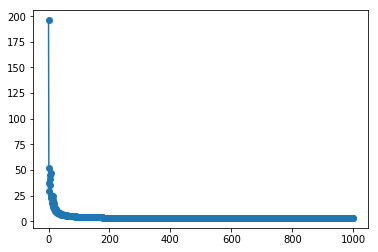

Model Prediction:
[[2.74453558 3.5730624  3.0013782  2.72495306 2.07634872 3.22343667
  2.16867417 4.40479659 4.75925313 1.95241956]
 [3.93110101 2.65246219 2.81375603 4.58581008 0.35362361 0.4780791
  0.12669202 4.14591792 3.86561675 4.29266286]
 [4.83346695 3.95758285 2.31372635 3.87466965 0.60928358 3.15844329
  0.72523497 4.68932701 2.63658184 2.08560523]
 [1.35017893 3.83396737 2.28135232 2.82940949 0.1291836  3.05680769
  3.0107386  3.0909186  4.68444611 3.36702171]
 [1.78355249 2.173264   3.43614197 0.32010237 3.2775662  3.31310629
  1.05220428 0.67575537 1.58832707 1.79163532]]


Actual Rating:
[[2.74406752 3.57594683 3.01381688 2.72441591 2.118274   3.22947057
  2.18793606 4.458865   4.8183138  1.91720759]
 [3.95862519 2.6444746  2.84022281 4.62798319 0.35518029 0.4356465
  0.10109199 4.16309923 3.89078375 4.35006074]
 [4.89309171 3.99579282 2.30739681 3.90264588 0.59137213 3.19960511
  0.71676644 4.72334459 2.60924161 2.0733097 ]
 [1.32277806 3.87116845 2.28075166 2.84216974 

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

steps = 1000
learning_rate = 5e-2
losses = []

for step in range(steps):
    losses.append(loss(U, M, R, reg))
    grad_u, grad_m = compute_grad(U, M, R, reg)
    U = U - learning_rate * grad_u
    M = M - learning_rate * grad_m
    
plt.plot(list(range(steps)), losses, 'o-')
plt.show()

print "Model Prediction:"
print np.dot(U, M.T)

print "\n"

print "Actual Rating:"
print R

## Given a new user

Suppose that we are given a new user, we can perform the same type of training on this user except that we are not modifying the movie features; we will only modify the new user's preference vector.

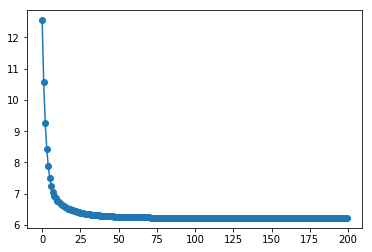

Model Prediction:
[[2.76690846 2.98396037 2.79845699 2.91466947 1.40023845 2.21762572
  1.36317421 3.54381645 3.85284556 2.72895791]]


Actual Rating:
[[3.58429841 1.98029851 2.82710656 0.91639918 0.7242388  2.4402814
  1.77806369 4.70215973 3.82662627 3.7433181 ]]


In [3]:
single_user_matrix = np.random.rand(1, lat_dim)
single_user_rating = np.random.rand(1, num_movie) * 5
losses = []
learning_rate = 1e-2

steps = 200
for step in range(steps):
    losses.append(loss(single_user_matrix, M, single_user_rating, reg))
    grad_u, _ = compute_grad(single_user_matrix, M, single_user_rating, reg)
    single_user_matrix = single_user_matrix - learning_rate * grad_u
    
plt.plot(list(range(steps)), losses, 'o-')
plt.show()

print "Model Prediction:"
print np.dot(single_user_matrix, M.T)

print "\n"

print "Actual Rating:"
print single_user_rating

After all this is a linear model, it does have difficulty with fitting random data perfectly.